Linear Regression Model for Tourism Data 

In [11]:
import os  
import sys

os.getcwd()


'/home/clif_lastrophysicien/ELO2_LAPERLE_HT/4_data_analysis'

Step 1: Understanding the Data

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

warnings.filterwarnings("ignore")

# Set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [14]:
# Set style for better visualizations
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")


2: Loading and Exploring the Data

In [16]:
# Load the dataset
df = pd.read_csv("UN_tourism_caribbean_countries_cleaned.csv")

# Display basic information
print("=== DATASET INFORMATION ===")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\n=== BASIC STATISTICS ===")
print(df.describe())

print(f"\n=== UNIQUE VALUES ===")
print(f"Visitor types: {df['type_of_visitors'].unique()}")
print(f"Number of countries: {df['country_receiving'].nunique()}")
print(f"Years range: {df['year'].min()} to {df['year'].max()}")


=== DATASET INFORMATION ===
Shape: (3025, 6)

Columns: ['type_of_visitors', 'country_receiving', 'where_tourist_from', 'year', 'number_of_tourist', 'unit']

Data Types:
type_of_visitors       object
country_receiving      object
where_tourist_from     object
year                    int64
number_of_tourist     float64
unit                   object
dtype: object

Missing Values:
type_of_visitors      0
country_receiving     0
where_tourist_from    0
year                  0
number_of_tourist     0
unit                  0
dtype: int64

First 5 rows:
  type_of_visitors    country_receiving where_tourist_from  year  \
0    excursionists  Antigua and Barbuda              World  1995   
1    excursionists  Antigua and Barbuda              World  1996   
2    excursionists  Antigua and Barbuda              World  1997   
3    excursionists  Antigua and Barbuda              World  1998   
4    excursionists  Antigua and Barbuda              World  1999   

   number_of_tourist            unit  


In [20]:
data.info()

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type_of_visitors    3025 non-null   object 
 1   country_receiving   3025 non-null   object 
 2   where_tourist_from  3025 non-null   object 
 3   year                3025 non-null   int64  
 4   number_of_tourist   3025 non-null   float64
 5   unit                3025 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 141.9+ KB


,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist,unit
0,excursionists,Antigua and Barbuda,World,1995,227.0,thousand trips
1,excursionists,Antigua and Barbuda,World,1996,270.0,thousand trips
2,excursionists,Antigua and Barbuda,World,1997,286.0,thousand trips
3,excursionists,Antigua and Barbuda,World,1998,336.0,thousand trips
4,excursionists,Antigua and Barbuda,World,1999,328.0,thousand trips


 Understanding the Data Structure

  The dataset contains:

  type_of_visitors: Type of visitors (tourists, excursionists, visitors_total)

  country_receiving: Destination country

  where_tourist_from: Origin (all are "World")

  year: Year of data

  number_of_tourist: Number of visitors (in thousand trips)

  unit: Measurement unit (thousand trips)

3. Data Preprocessing

=== HANDLING MISSING VALUES ===
Missing values before cleaning: 0
Missing values after cleaning: 0

=== ENCODING CATEGORICAL VARIABLES ===
Encoded 30 countries
Encoded visitor types: ['excursionists' 'tourists' 'visitors_total']

=== FEATURE ENGINEERING ===
New features created: decade, post_2000, post_2010, covid_period

=== DATA DISTRIBUTION ===


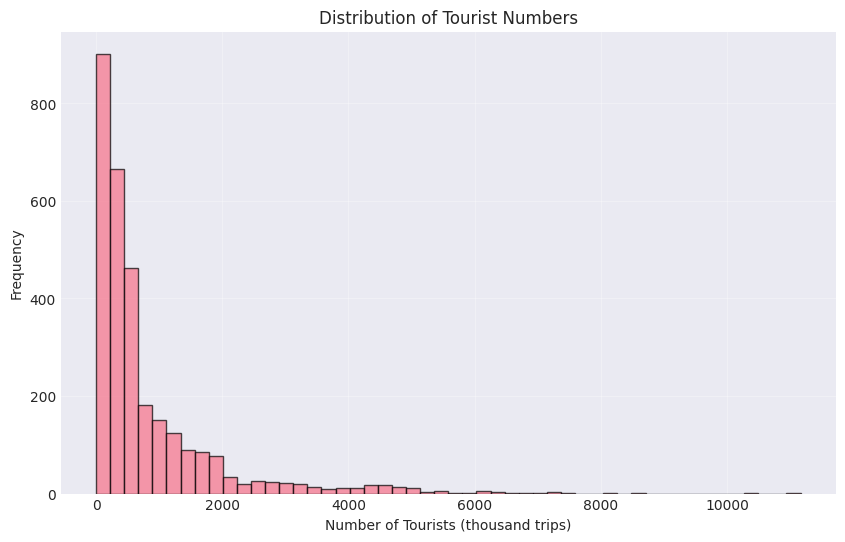

Skewness: 2.99


In [21]:
# Step 3.1: Handle missing values
print("=== HANDLING MISSING VALUES ===")
print(f"Missing values before cleaning: {df.isnull().sum().sum()}")

# Since this is time series data, we'll fill missing values with forward/backward fill
df["number_of_tourist"] = (
    df["number_of_tourist"].fillna(method="ffill").fillna(method="bfill")
)

print(f"Missing values after cleaning: {df.isnull().sum().sum()}")

# Step 3.2: Convert categorical variables to numerical
print("\n=== ENCODING CATEGORICAL VARIABLES ===")

# Create label encoders
country_encoder = LabelEncoder()
visitor_type_encoder = LabelEncoder()

# Encode categorical variables
df["country_encoded"] = country_encoder.fit_transform(df["country_receiving"])
df["visitor_type_encoded"] = visitor_type_encoder.fit_transform(df["type_of_visitors"])

print(f"Encoded {len(country_encoder.classes_)} countries")
print(f"Encoded visitor types: {visitor_type_encoder.classes_}")

# Step 3.3: Feature Engineering
print("\n=== FEATURE ENGINEERING ===")

# Create additional features that might be useful
df["decade"] = (df["year"] // 10) * 10
df["post_2000"] = (df["year"] > 2000).astype(int)
df["post_2010"] = (df["year"] > 2010).astype(int)

# COVID-19 impact indicator (2020-2021)
df["covid_period"] = ((df["year"] >= 2020) & (df["year"] <= 2021)).astype(int)

print("New features created: decade, post_2000, post_2010, covid_period")

# Step 3.4: Check data distribution
print("\n=== DATA DISTRIBUTION ===")
plt.figure(figsize=(10, 6))
plt.hist(df["number_of_tourist"], bins=50, edgecolor="black", alpha=0.7)
plt.title("Distribution of Tourist Numbers")
plt.xlabel("Number of Tourists (thousand trips)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Skewness: {df['number_of_tourist'].skew():.2f}")
